In [91]:
import numpy as np
import pandas as pd
import glob
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import entropy
from scipy.optimize import curve_fit
import datetime
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic' # 폰트설정
matplotlib.rcParams['font.size'] = 10 # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False

In [76]:
os.chdir(r'C:\Users\pjk98\Data\New_Folder\JS_0531-0601')
file_list = glob.glob("./*.csv", recursive=True)

In [3]:
df = pd.read_csv(file_list[0], sep=',',header=0)
df

,Unnamed: 0,Time,External Sound,Ambient Temp.,Target Temp.
0,1,2023-05-31 23:30:00,563,26.77,26.59
1,2,2023-05-31 23:30:00,533,26.77,26.59
2,3,2023-05-31 23:30:00,400,26.77,26.59
3,4,2023-05-31 23:30:00,483,26.77,26.59
4,5,2023-05-31 23:30:00,495,26.77,26.59
...,...,...,...,...,...
602,610,2023-05-31 23:30:00,421,26.95,26.71
603,611,2023-05-31 23:30:00,518,26.95,26.71
604,612,2023-05-31 23:30:00,429,26.95,26.71
605,613,2023-05-31 23:30:00,640,26.95,26.71


In [4]:
drop_columns=['Unnamed: 0', 'Time','Ambient Temp.', 'Target Temp.']
df.drop(labels=drop_columns, axis=1, inplace=True) # 불필요한 컬럼 제거
df

,External Sound
0,563
1,533
2,400
3,483
4,495
...,...
602,421
603,518
604,429
605,640


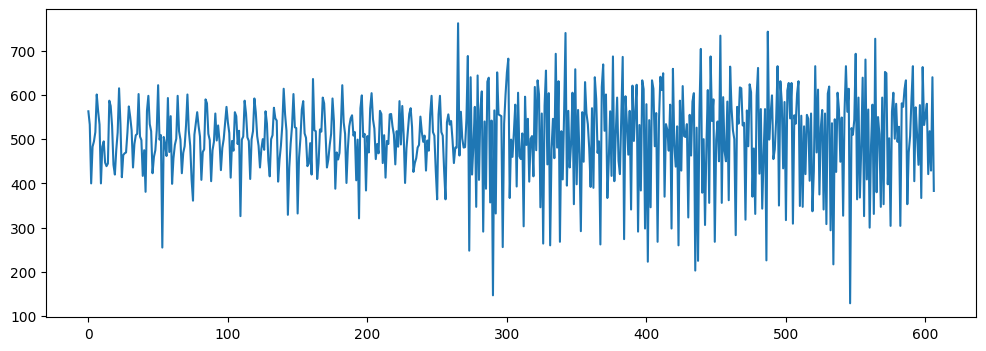

In [5]:
plt.figure(figsize=(12,4))
plt.plot(df['External Sound'])
plt.show()

In [6]:
def rms(stats):
    return(np.sqrt(np.mean(stats**2, axis=0)))
rms(df)
print(type(rms(df)))

<class 'pandas.core.series.Series'>


In [67]:
# 빈 데이터프레임 생성
time_df = pd.DataFrame()

# 파일 순회
for file in file_list:
    # CSV 파일 읽기
    df = pd.read_csv(file)
    
    # 'Time' 컬럼이 존재하는지 확인
    if 'Time' in df.columns:
        # 첫 번째 'Time' 컬럼 값만 선택하여 데이터프레임에 추가
        time_value = df['Time'].iloc[0]
        df = pd.DataFrame({'Time': [time_value]})
        time_df = pd.concat([time_df, df], ignore_index=True)

# 결과 출력
time_df

,Time
0,2023-05-31 23:30:00
1,2023-05-31 23:30:01
2,2023-05-31 23:30:02
3,2023-05-31 23:30:03
4,2023-05-31 23:30:04
...,...
3895,2023-06-01 00:34:55
3896,2023-06-01 00:34:56
3897,2023-06-01 00:34:57
3898,2023-06-01 00:34:58


In [77]:
def calculate_peak(stats):
    return np.array([np.max(stats)])
def rms(stats):
    return(np.sqrt(np.mean(stats**2, axis=0)))


rms_arr = np.array([])
peak_arr = np.array([])

for file in file_list:
    # 데이터 파일 읽기
    df = pd.read_csv(file, sep=',', header=0)
    drop_columns = ['Unnamed: 0', 'Time', 'Ambient Temp.', 'Target Temp.']  # 신호처리할 필요 없는 컬럼
    df.drop(labels=drop_columns, axis=1, inplace=True)  # 불필요한 컬럼 제거
    
    # value 추출
    rms_value = rms(df.values)
    peak = calculate_peak(df.values)
    
    rms_arr = np.concatenate([rms_arr, rms_value], axis=0)
    peak_arr = np.concatenate([peak_arr, peak], axis=0)
rms_arr = rms_arr.reshape(len(file_list), 1)
peak_arr = peak_arr.reshape(len(file_list), 1)

Ex_RMS_df = pd.DataFrame(rms_arr, columns=['External Sound'])
Ex_PEAK_df = pd.DataFrame(peak_arr, columns=['External Sound'])
Ex_RMS_df['type'] = 'JS'
Ex_RMS_df['Time'] = time_df
Ex_PEAK_df['type'] = 'JS'
Ex_PEAK_df['Time'] = time_df
new_order = ['Time', 'External Sound', 'type']
Ex_RMS_df = Ex_RMS_df.reindex(columns=new_order)
Ex_PEAK_df = Ex_RMS_df.reindex(columns=new_order)
Ex_RMS_df['Time'] = pd.to_datetime(Ex_RMS_df['Time'])
Ex_PEAK_df['Time'] = pd.to_datetime(Ex_RMS_df['Time'])
Ex_PEAK_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Time            3768 non-null   datetime64[ns]
 1   External Sound  3899 non-null   float64       
 2   type            3900 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 91.5+ KB


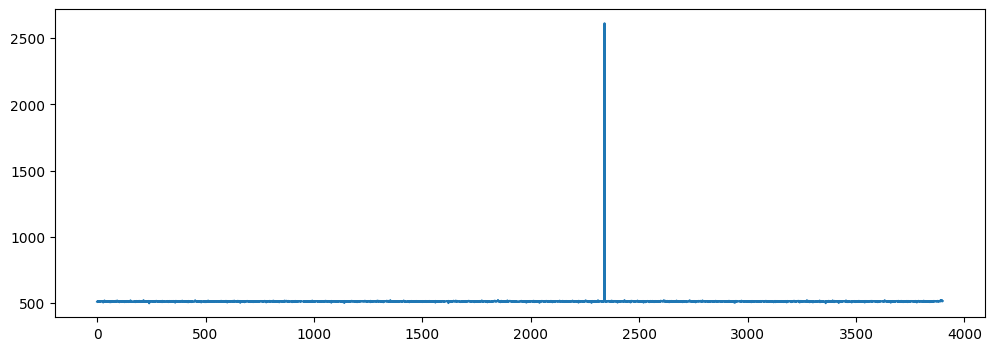

In [78]:
# JS
plt.figure(figsize=(12,4))
plt.plot(Ex_PEAK_df['External Sound'])
plt.show()

In [72]:
# JS, CMPS, SSJD, SSNC. 결측치 및 이상 데이터를 포함하는 행을 제외한 Internal Sound 열
# faulttypelist = ['CMPS', 'JS', 'SSJD', 'SSNC']
# for j in faulttypelist:

def rms(stats):
    return np.array([(np.sqrt(np.mean(stats**2, axis=0)))])

j = 'JS'
os.chdir("C:\\Users\\pjk98\Data\\BeltforSharing\\Belt_"+j)
filelist = glob.glob('**/*.txt', recursive=True)

rms_arr = np.array([])
std_arr = np.array([]) 

time_df = pd.DataFrame()
for i in range(len(filelist)):
    currentfile = datetime.datetime(2023, int(filelist[i][:2]), int(filelist[i][3:5]), int(filelist[i][6:8]), int(filelist[i][9:11]), int(filelist[i][12:14]))
    with open(filelist[i], 'r') as file:
        data = []
        for line in file:
            values = line.strip().split(',')
            if len(values) == 3:
                data.append(values)
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")] = pd.DataFrame(data, columns=['Internal Sound', 'Ambient Temp.', 'Target Temp.']) # 동적 변수 생성
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Internal Sound'] = globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Internal Sound'].astype(int)
        # globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Ambient Temp.'] = globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Ambient Temp.'].astype(float) # 온도 데이터 필요할 때 살리세요.
        # globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Target Temp.'] = globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Target Temp.'].astype(float)
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")] = pd.DataFrame(globals()['A_'+currentfile.strftime("%m%d_%H%M%S")].loc[:, 'Internal Sound']) # 온도 데이터 필요할 때 죽이세요.
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Time'] = currentfile # Time 열 추가. 모든 행이 같은 시각.
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Time'] = pd.to_datetime(globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Time'])
        df = globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]
        
        # rms value 추출
        rms_value = rms(df['Internal Sound'].values)
        std = np.array([(df['Internal Sound'].values).std()])
        rms_arr = np.concatenate([rms_arr, rms_value], axis=0)
        std_arr = np.concatenate([std_arr, std], axis=0)
        
    if 'Time' in df.columns:
        # 첫 번째 'Time' 컬럼 값만 선택하여 데이터프레임에 추가
        time_value = df['Time'].iloc[0]
        df = pd.DataFrame({'Time': [time_value]})
        time_df = pd.concat([time_df, df], ignore_index=True)   
      
rms_arr = rms_arr.reshape(len(filelist), 1)
std_arr = std_arr.reshape(len(filelist), 1)
In_RMS_df = pd.DataFrame(rms_arr, columns=['Internal Sound'])
In_RMS_df['type'] = 'JS'
In_RMS_df['Time'] = time_df
new_order = ['Time','Internal Sound','type']
In_RMS_df = In_RMS_df.reindex(columns=new_order)
In_STD_df = pd.DataFrame(std_arr, columns=['Internal Sound'])
In_STD_df['type'] = 'JS'
In_STD_df['Time'] = time_df
new_order = ['Time','Internal Sound','type']
In_STD_df = In_STD_df.reindex(columns=new_order)
In_STD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3768 entries, 0 to 3767
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Time            3768 non-null   datetime64[ns]
 1   Internal Sound  3768 non-null   float64       
 2   type            3768 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 88.4+ KB


In [73]:
In_STD_df

,Time,Internal Sound,type
0,2023-05-31 23:29:59,191.107703,JS
1,2023-05-31 23:30:00,194.540926,JS
2,2023-05-31 23:30:01,195.245556,JS
3,2023-05-31 23:30:02,191.431685,JS
4,2023-05-31 23:30:03,192.721901,JS
...,...,...,...
3763,2023-06-01 00:35:46,204.111929,JS
3764,2023-06-01 00:35:47,201.548170,JS
3765,2023-06-01 00:35:48,205.631273,JS
3766,2023-06-01 00:35:49,191.167950,JS


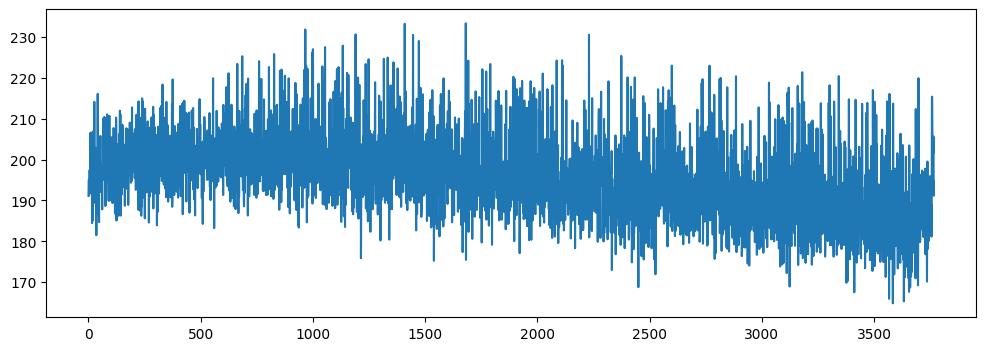

In [74]:
# JS Internal Sound
plt.figure(figsize=(12,4))
plt.plot(In_STD_df['Internal Sound'])
plt.show()

In [84]:
os.chdir(r'C:\Users\pjk98\Data\Tension\JS')
file_list = glob.glob("./*.csv", recursive=True)
print(file_list)

# for i in range(len(file_list)):
Tension_df = pd.read_csv(file_list[0], sep=',',header=0,encoding='CP949')
Tension_df.columns=['Time','Tension','이건 뭐징??']
drop_columns=['이건 뭐징??']
Tension_df.drop(labels=drop_columns, axis=1, inplace=True) # 불필요한 컬럼 제거
Tension_df['type'] = 'JS'
Tension_df

['.\\JS_23-06-01.csv']


,Time,Tension,type
0,[2023/05/31] 23:35:19,110.0,JS
1,[2023/05/31] 23:35:20,111.0,JS
2,[2023/05/31] 23:35:21,110.0,JS
3,[2023/05/31] 23:35:22,108.0,JS
4,[2023/05/31] 23:35:23,108.0,JS
...,...,...,...
3595,[2023/06/01] 00:35:14,106.0,JS
3596,[2023/06/01] 00:35:15,112.0,JS
3597,[2023/06/01] 00:35:16,108.0,JS
3598,[2023/06/01] 00:35:17,104.0,JS


In [14]:
Tension_df['Time'] = Tension_df['Time'].str.replace(r'\[|\]', '')
Tension_df['Time'] = Tension_df['Time'].str.replace(r'\/', '-')
Tension_df['Time'] = pd.to_datetime(Tension_df['Time'])
Tension_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Time     3600 non-null   datetime64[ns]
 1   Tension  3600 non-null   float64       
 2   type     3600 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 84.5+ KB


C:\Users\pjk98\AppData\Local\Temp\ipykernel_28936\2738122520.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Tension_df['Time'] = Tension_df['Time'].str.replace(r'\[|\]', '')
C:\Users\pjk98\AppData\Local\Temp\ipykernel_28936\2738122520.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Tension_df['Time'] = Tension_df['Time'].str.replace(r'\/', '-')


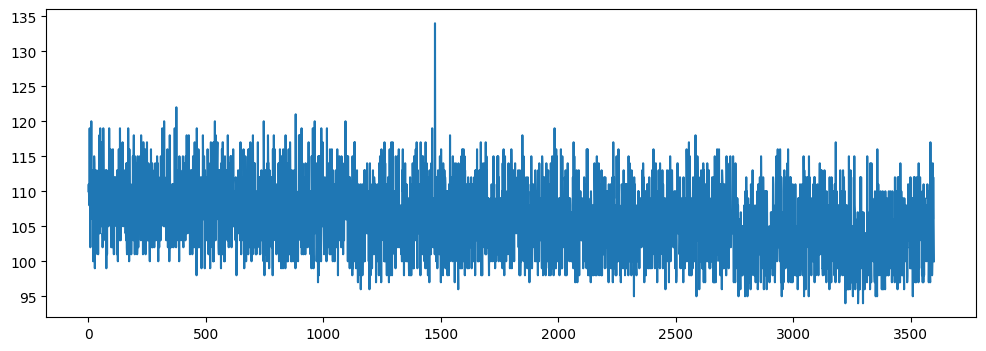

In [15]:
# JS Tension
plt.figure(figsize=(12,4))
plt.plot(Tension_df.Tension)
plt.show()

In [79]:
# 3개의 데이터프레임 병합
JS = pd.merge(Tension_df, Ex_PEAK_df, on='Time')
JS = pd.merge(JS, In_STD_df, on='Time')
# new_order = ['Time', 'Tension', 'External Sound', 'type']
new_order = ['Time','Tension','Internal Sound', 'External Sound', 'type']
JS = JS.reindex(columns=new_order)
JS['type'] = 'JS'

print(JS)

                    Time  Tension  Internal Sound  External Sound type
0    2023-05-31 23:35:19    110.0      200.545969      512.633858   JS
1    2023-05-31 23:35:20    111.0      198.577450      513.552628   JS
2    2023-05-31 23:35:21    110.0      199.740032      511.755122   JS
3    2023-05-31 23:35:22    108.0      203.516083      511.863789   JS
4    2023-05-31 23:35:23    108.0      212.626293      512.422717   JS
...                  ...      ...             ...             ...  ...
3415 2023-06-01 00:35:14    106.0      189.698687      511.030461   JS
3416 2023-06-01 00:35:15    112.0      186.785005      513.511504   JS
3417 2023-06-01 00:35:16    108.0      193.451063      515.784609   JS
3418 2023-06-01 00:35:17    104.0      194.930191      514.960403   JS
3419 2023-06-01 00:35:18    100.0      184.091884      517.353860   JS

[3420 rows x 5 columns]


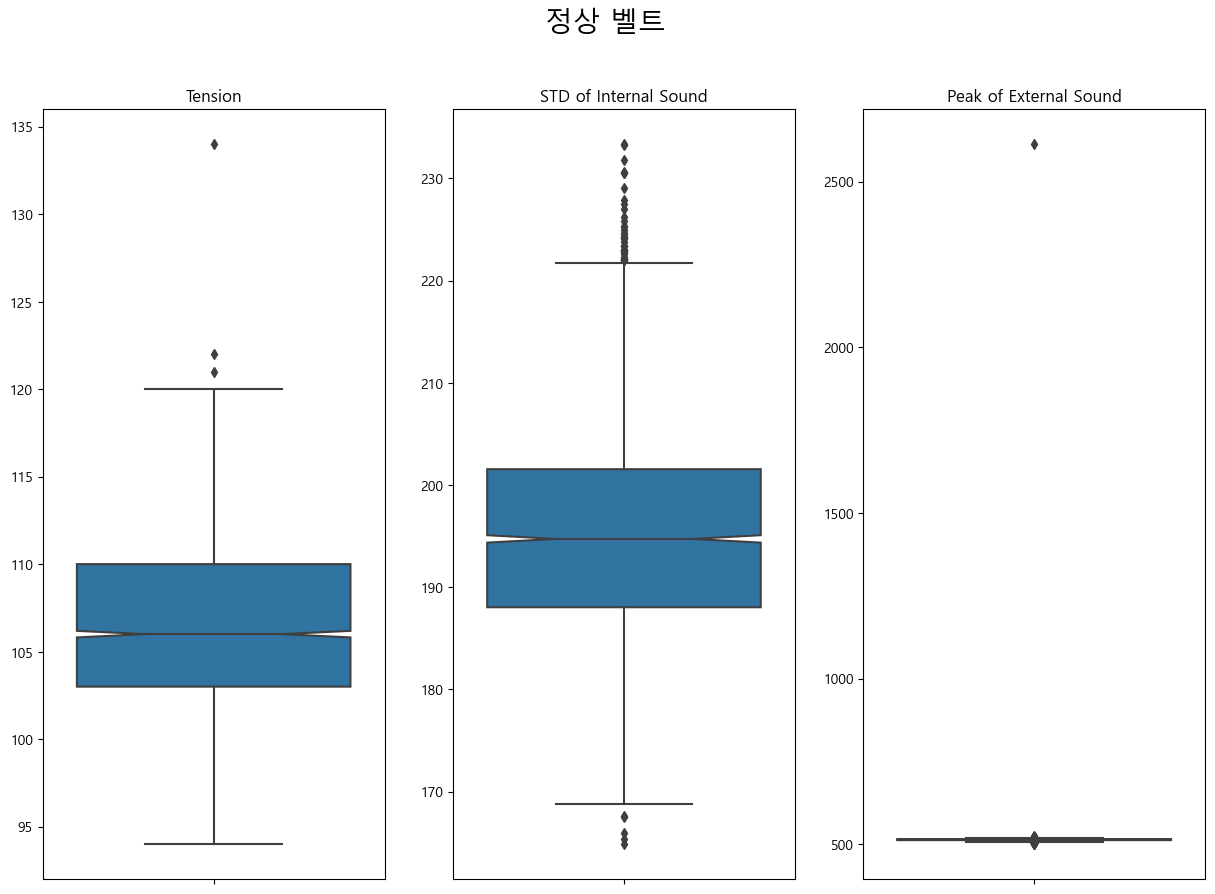

In [145]:
fig, axes = plt.subplots(1, 3, figsize=(15, 10))

sns.boxplot(data=JS['Tension'], ax=axes[0], notch=True)
sns.boxplot(data=JS['Internal Sound'], ax=axes[1], notch=True)
sns.boxplot(data=JS['External Sound'], ax=axes[2], notch=True)

axes[0].set_title("Tension")
axes[1].set_title("STD of Internal Sound")
axes[2].set_title("Peak of External Sound")

axes[0].set_xticklabels([''])
axes[1].set_xticklabels([''])
axes[2].set_xticklabels([''])

plt.suptitle('정상 벨트', fontsize=20)

plt.show()

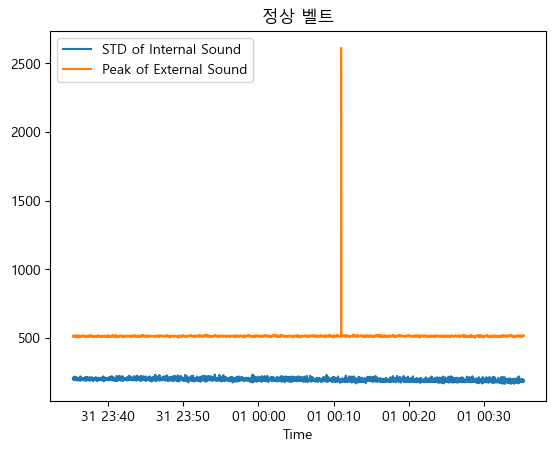

In [141]:
x = JS['Time']
y1 = JS['Internal Sound']
y2 = JS['External Sound']
plt.plot(x, y1, label='STD of Internal Sound')
plt.plot(x, y2, label='Peak of External Sound')

# 그래프 제목, 축 라벨 설정
plt.title('정상 벨트')
plt.xlabel('Time')
plt.ylabel('')

plt.legend(loc='upper left')
plt.show()